In [2]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.mlab as mlab
import matplotlib
from matplotlib import style
plt.style.use('Solarize_Light2')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,8)

pd.options.mode.chained_assignment = None


In [3]:
###Import af data

dfklip = pd.read_csv('uge29Klippelog.csv')

dfpogo = pd.read_csv('uge29pogo.csv')

dfstimp = pd.read_csv('uge29Stimp.csv')

print("Clipdata:")
print (dfklip.describe())

print("\nPogo:")
print (dfpogo.describe())

print("\nStimp:")
print(dfstimp.describe())

Clipdata:
               Hul
count  4340.000000
mean     10.500000
std       5.766946
min       1.000000
25%       5.750000
50%      10.500000
75%      15.250000
max      20.000000

Pogo:
       Dataset  Moisture (Avg) (%)  Moisture (Min) (%)  Moisture (Max) (%)  \
count     72.0           72.000000           72.000000           72.000000   
mean       1.0           27.252778           20.972222           35.805556   
std        0.0            2.091968            1.964274            3.691020   
min        1.0           22.300000           17.000000           27.000000   
25%        1.0           25.975000           20.000000           33.000000   
50%        1.0           27.550000           21.000000           36.000000   
75%        1.0           28.600000           22.000000           39.000000   
max        1.0           33.500000           27.000000           41.000000   

       Temperature (Avg) (°C)  Temperature - Min (°C)  Temperature (Max) (°C)  
count               72.000000

In [4]:
dfklip.head()

,Dato,Retning,Hul,Liter,Maskine,Højde,Bemærkning,Person,Cleanup,Brush,Rulle,Led,Unnamed: 12
0,16/04/2023,NaN,1,4,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
1,16/04/2023,NaN,2,6,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
2,16/04/2023,NaN,3,5,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
3,16/04/2023,NaN,4,8,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
4,16/04/2023,NaN,5,4,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN


In [5]:
###Datacleaning - Drop values + cols 

dfklip = dfklip.dropna(subset=['Dato'])

dfklip = dfklip.loc[:, ~dfklip.columns.str.startswith('Unnamed')]

dfstimp = dfstimp[dfstimp.columns[:dfstimp.columns.get_loc('Stimp F') + 1]]
dfstimp = dfstimp.dropna(subset=['Dato'])

print(dfklip.head())
print(dfstimp.head())

         Dato Retning  Hul Liter Maskine Højde Bemærkning Person Cleanup  \
0  16/04/2023     NaN    1     4     NaN   NaN        NaN    NaN      No   
1  16/04/2023     NaN    2     6     NaN   NaN        NaN    NaN      No   
2  16/04/2023     NaN    3     5     NaN   NaN        NaN    NaN      No   
3  16/04/2023     NaN    4     8     NaN   NaN        NaN    NaN      No   
4  16/04/2023     NaN    5     4     NaN   NaN        NaN    NaN      No   

  Brush Rulle  Led  
0   NaN   NaN  NaN  
1   NaN   NaN  NaN  
2   NaN   NaN  NaN  
3   NaN   NaN  NaN  
4   NaN   NaN  NaN  
         Dato     Hul  Stimp CM Stimp F
0  10/05/2023  Hul 15     249.0     8,2
1  10/05/2023  Hul 15     246.0     8,1
2  10/05/2023  Hul 15     248.0     8,1
3  10/05/2023  Hul 15     273.0     9,0
4  10/05/2023  Hul 15     280.0     9,2


In [6]:
### Datacleaning værdiger
dfklip['Liter'] = dfklip['Liter'].astype(str).str.replace(',','.')

dfstimp = dfstimp.rename(columns={'Stimp F': 'Stimp_F'})
dfstimp = dfstimp.rename(columns={'Stimp CM': 'Stimp_CM'})
dfstimp['Stimp_F'] = dfstimp['Stimp_F'].astype(str).str.replace(',','.').astype(float)

dfpogo[['Dato','Time']] = dfpogo['Sample Date'].str.split(' ', n=1,expand=True)
dfpogo = dfpogo.drop(columns=['Sample Date'])


In [7]:
def categorize_stimp(stimp):
    if pd.isna(stimp):
        return None
    elif stimp < 9:
        return 'Low'
    elif 10 <= stimp <= 10.5:
        return 'Target range'
    else:
        return 'High'
    
dfstimp['Stimp_range'] = dfstimp['Stimp_F'].apply(categorize_stimp)


In [8]:
###Datacleaning Dato til pd.datetime
from datetime import datetime, timedelta

dfklip['Dato'] = pd.to_datetime(dfklip['Dato'], format='%d/%m/%Y', dayfirst=True)
dfstimp['Dato'] = pd.to_datetime(dfstimp['Dato'], format='%d/%m/%Y', dayfirst=True)
dfpogo['Dato'] = pd.to_datetime(dfpogo['Dato'], format='%Y-%m-%d')

dfklip['Week'] = dfklip['Dato'].dt.isocalendar().week
dfstimp['Week'] = dfstimp['Dato'].dt.isocalendar().week
dfpogo['Week'] = dfpogo['Dato'].dt.isocalendar().week

dfklip['Year'] = dfklip['Dato'].dt.year
dfstimp['Year'] = dfstimp['Dato'].dt.year
dfpogo['Year']  = dfpogo['Dato'].dt.year

print("Cleaned dfklip:")
print(dfklip.head())
print("\nCleaned dfstimp:")
print(dfstimp.head())
print("\nCleaned dfpogo:")
print(dfpogo.head())

Cleaned dfklip:
        Dato Retning  Hul Liter Maskine Højde Bemærkning Person Cleanup Brush  \
0 2023-04-16     NaN    1     4     NaN   NaN        NaN    NaN      No   NaN   
1 2023-04-16     NaN    2     6     NaN   NaN        NaN    NaN      No   NaN   
2 2023-04-16     NaN    3     5     NaN   NaN        NaN    NaN      No   NaN   
3 2023-04-16     NaN    4     8     NaN   NaN        NaN    NaN      No   NaN   
4 2023-04-16     NaN    5     4     NaN   NaN        NaN    NaN      No   NaN   

  Rulle  Led  Week  Year  
0   NaN  NaN    15  2023  
1   NaN  NaN    15  2023  
2   NaN  NaN    15  2023  
3   NaN  NaN    15  2023  
4   NaN  NaN    15  2023  

Cleaned dfstimp:
        Dato     Hul  Stimp_CM  Stimp_F Stimp_range  Week  Year
0 2023-05-10  Hul 15     249.0      8.2         Low    19  2023
1 2023-05-10  Hul 15     246.0      8.1         Low    19  2023
2 2023-05-10  Hul 15     248.0      8.1         Low    19  2023
3 2023-05-10  Hul 15     273.0      9.0        High    19  20

<function matplotlib.pyplot.show(close=None, block=None)>

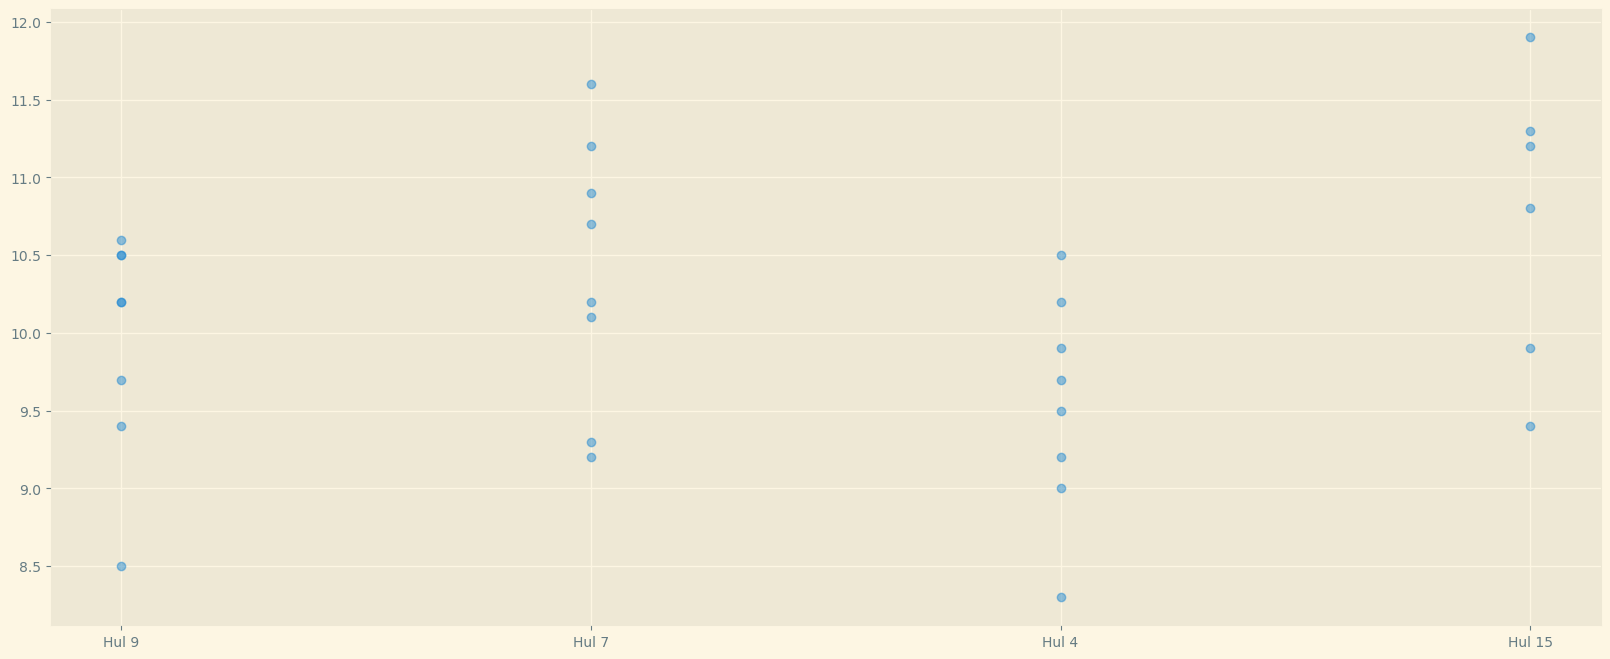

In [9]:
uge_29_stimp = dfstimp[dfstimp['Week'] == 29]

plt.figure(figsize=(20,8))
plt.scatter(uge_29_stimp['Hul'],uge_29_stimp['Stimp_F'],alpha=0.5)
plt.show



Average ml/m2 per Green:
    Hul  ml_per_m2
0     1  14.916533
1     2  16.182573
2     3  13.412564
3     4  15.269461
4     5  12.975391
5     6  14.080000
6     7  15.726496
7     8  14.446953
8     9  14.315789
9    10  16.494845
10   11  14.352941
11   12  15.805471
12   13  15.541922
13   14  14.495413
14   15  13.873626
15   16  18.233083
16   17  17.063492
17   18  14.051522
18   19   8.412483
19   20  12.043796


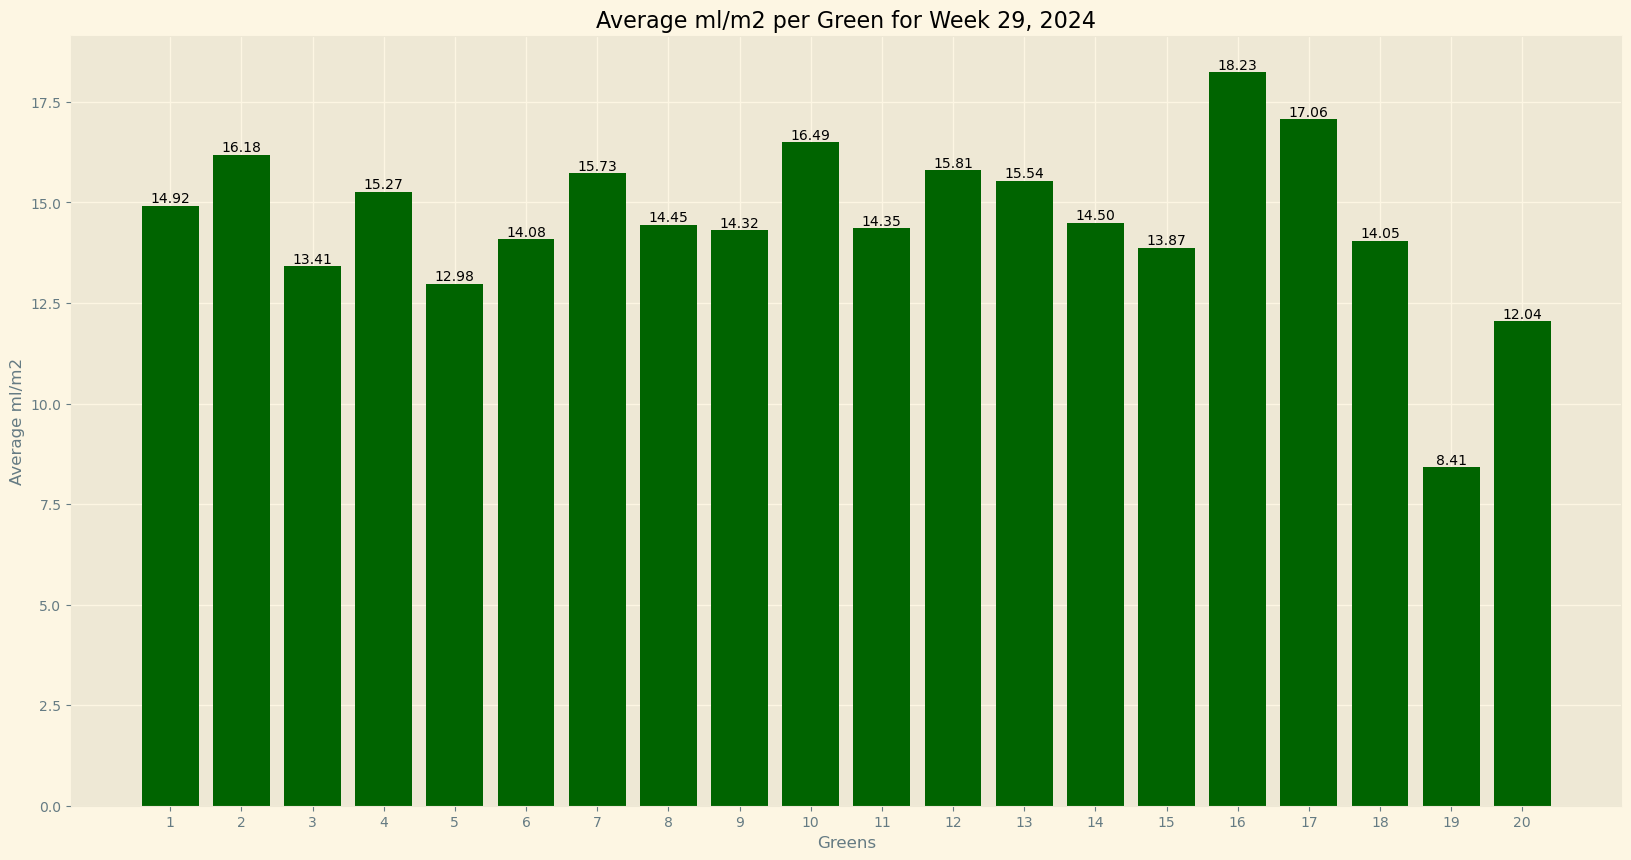

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Green sizes dictionary
green_sizes = {
    '1': 455.87, '2': 482, '3': 589, '4': 668, '5': 447, '6': 625, '7': 585, '8': 443, '9': 475, '10': 485,
    '11': 425, '12': 658, '13': 489, '14': 545, '15': 728, '16': 532, '17': 504, '18': 427, '19': 737, '20': 274
}

###ÆNDRE HER FOR ANDEN UGE 
mlm2_uge = dfklip[(dfklip['Week'] == 29) & (dfklip['Year'] == 2024)]

# Ensure 'Hul' is string for matching green sizes
mlm2_uge['Hul'] = mlm2_uge['Hul'].astype(str)

# Calculate ml/m²
mlm2_uge['Green Size'] = mlm2_uge['Hul'].map(green_sizes)
mlm2_uge['Liter'] = mlm2_uge['Liter'].astype(str).str.replace(',', '.').astype(float)
mlm2_uge['ml_per_m2'] = (mlm2_uge['Liter'] * 1000) / mlm2_uge['Green Size']

# Group by 'Hul' to calculate the average ml_per_m2 per green
average_ml_per_m2 = mlm2_uge.groupby('Hul')['ml_per_m2'].mean().reset_index()

# Ensure all 'Hul' values from 1 to 20 are included
all_huls = pd.DataFrame({'Hul': [str(i) for i in range(1, 21)]})
average_ml_per_m2 = all_huls.merge(average_ml_per_m2, on='Hul', how='left').fillna(0)

# Convert 'Hul' back to integers for sorting and plotting
average_ml_per_m2['Hul'] = average_ml_per_m2['Hul'].astype(int)
average_ml_per_m2 = average_ml_per_m2.sort_values('Hul')

# Print the result
print("Average ml/m2 per Green:")
print(average_ml_per_m2)

# Plot the result as a bar plot with darker green bars and labels
plt.figure(figsize=(20, 10))
bars = plt.bar(average_ml_per_m2['Hul'], average_ml_per_m2['ml_per_m2'], color='darkgreen')
plt.xlabel('Greens')
plt.ylabel('Average ml/m2')
plt.title('Average ml/m2 per Green for Week 29, 2024')
plt.xticks(ticks=average_ml_per_m2['Hul'], labels=average_ml_per_m2['Hul'])

# Add labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

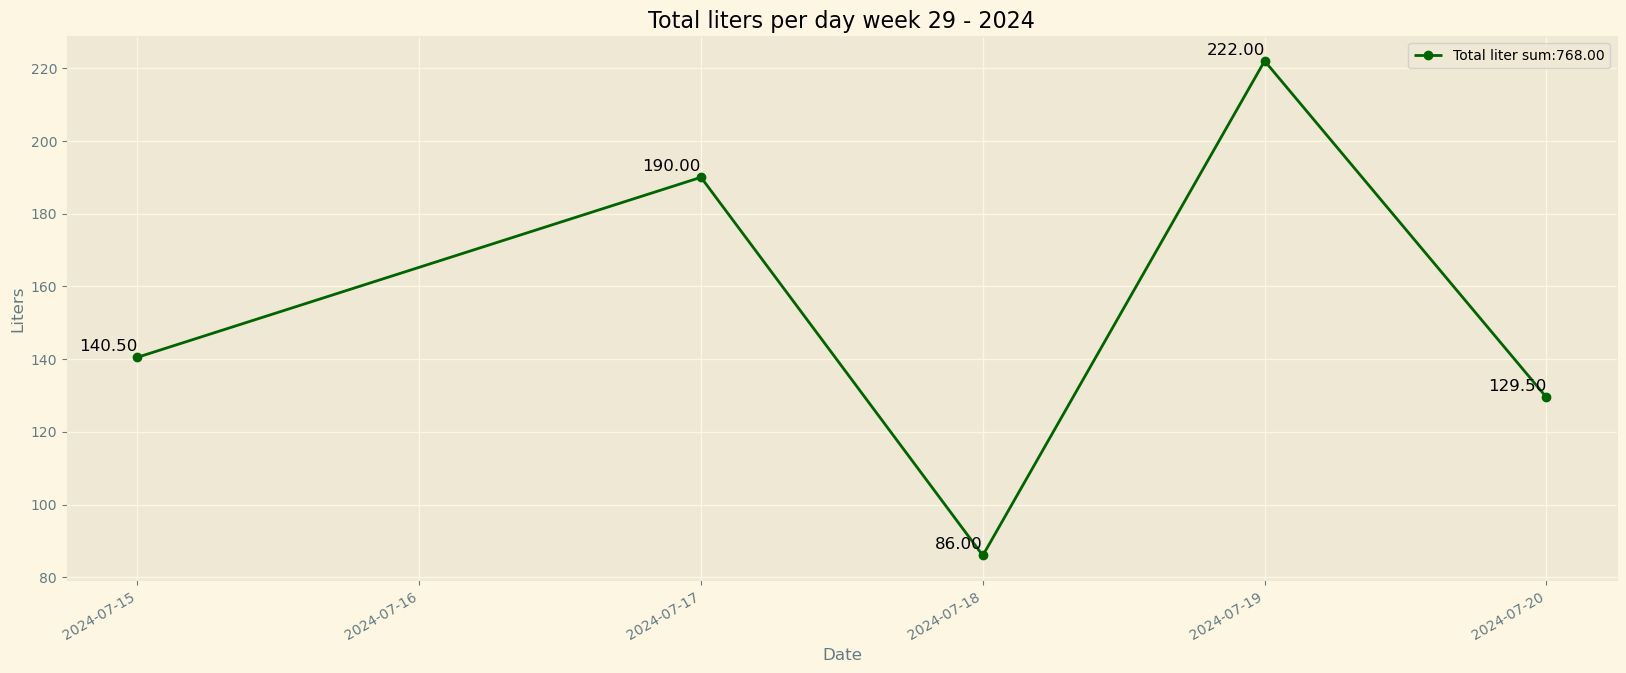

In [41]:
# Filter the data for the specific week and year
line_uge = dfklip[(dfklip['Week'] == 29) & (dfklip['Year'] == 2024)]

line_uge['Hul'] = line_uge['Hul'].astype(str)
line_uge['Liter'] = line_uge['Liter'].astype(str).str.replace(',', '.').astype(float)




# Group the data by 'dato' and sum the 'Liter' column
line_liter = line_uge.groupby('Dato')['Liter'].sum()
total_week_liters =line_liter.sum()
# Plot the line graph
plt.figure(figsize=(20, 8))
line_liter.plot(kind='line', marker='o',color='darkgreen')
plt.title('Total liters per day week 29 - 2024')
plt.xlabel('Date')
plt.ylabel('Liters')
plt.grid(True)


# Annotate each data point with its value
for x, y in zip(line_liter.index, line_liter.values):
    plt.text(x, y + 0.9, f'{y:.2f}', ha='right', va='bottom', fontsize=12)

plt.legend([f'Total liter sum:{total_week_liters:.2f}'], loc='upper right')

plt.show()



      Hul  Stimp_F
0  Hul 15  10.7500
1   Hul 4   9.5375
2   Hul 7  10.4000
3   Hul 9   9.9500

Stimp_avg_Uge 10.12


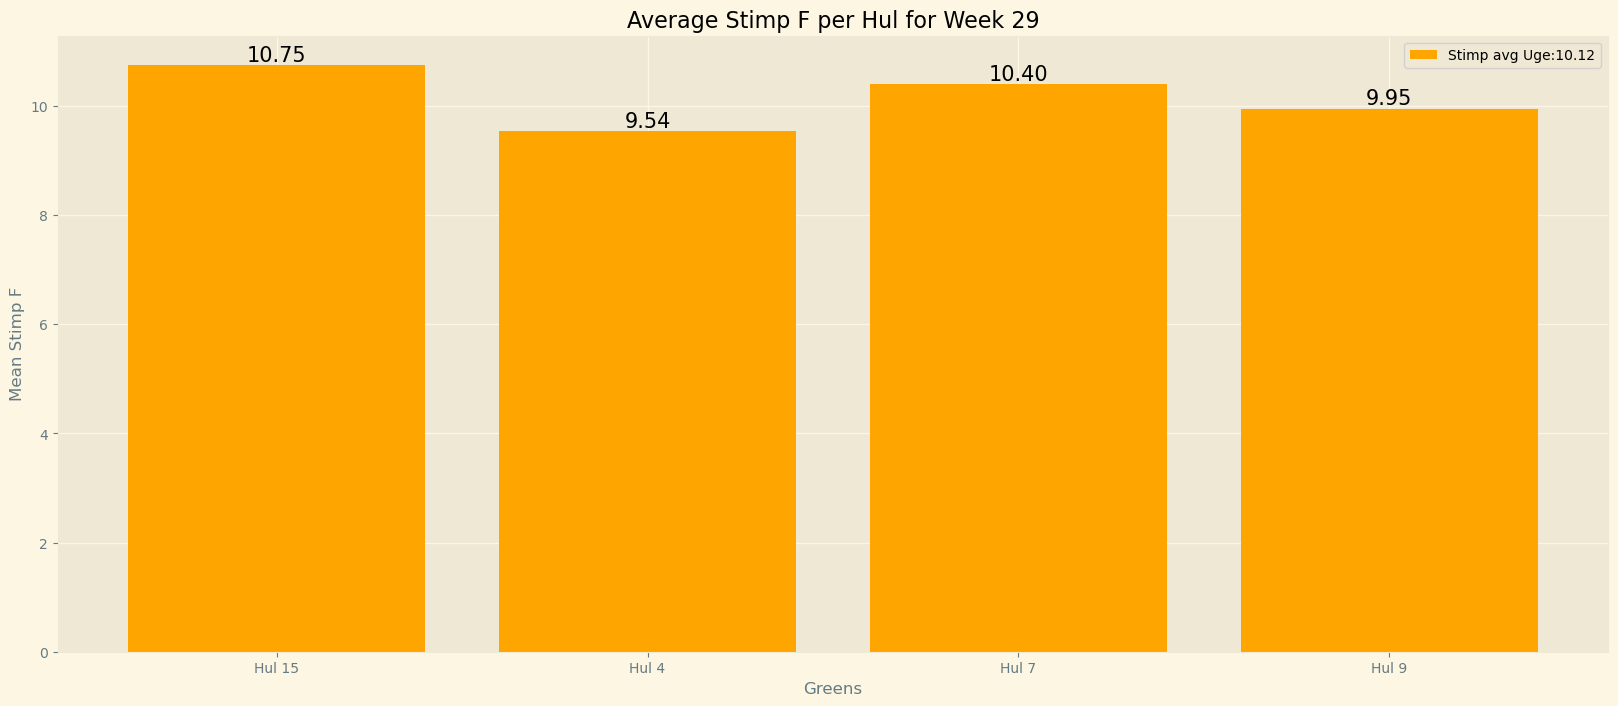

In [23]:
###ÆNDRE HER FOR ANDEN UGE 
stimp_uge = dfstimp[(dfstimp['Week'] == 29) & (dfstimp['Year'] == 2024)]



mean_stimp = stimp_uge.groupby('Hul')['Stimp_F'].mean().reset_index()
stimp_avg_Uge = stimp_uge['Stimp_F'].mean()

# Print the result to ensure it is correct
print(mean_stimp)
print("\nStimp_avg_Uge",stimp_avg_Uge)
# Plot the bar chart
plt.figure(figsize=(20, 8))
bars = plt.bar(mean_stimp['Hul'], mean_stimp['Stimp_F'], color='orange')
plt.xlabel('Greens')
plt.ylabel('Mean Stimp F')
plt.title('Average Stimp F per Hul for Week 29')
plt.xticks(mean_stimp['Hul'])

# Add labels on top of the bars
for index, row in mean_stimp.iterrows():
    plt.text(row['Hul'], row['Stimp_F'], f'{row["Stimp_F"]:.2f}', ha='center', va='bottom', fontsize=15)

plt.legend([f'Stimp avg Uge:{stimp_avg_Uge:.2f}'], loc='upper right')

plt.show()

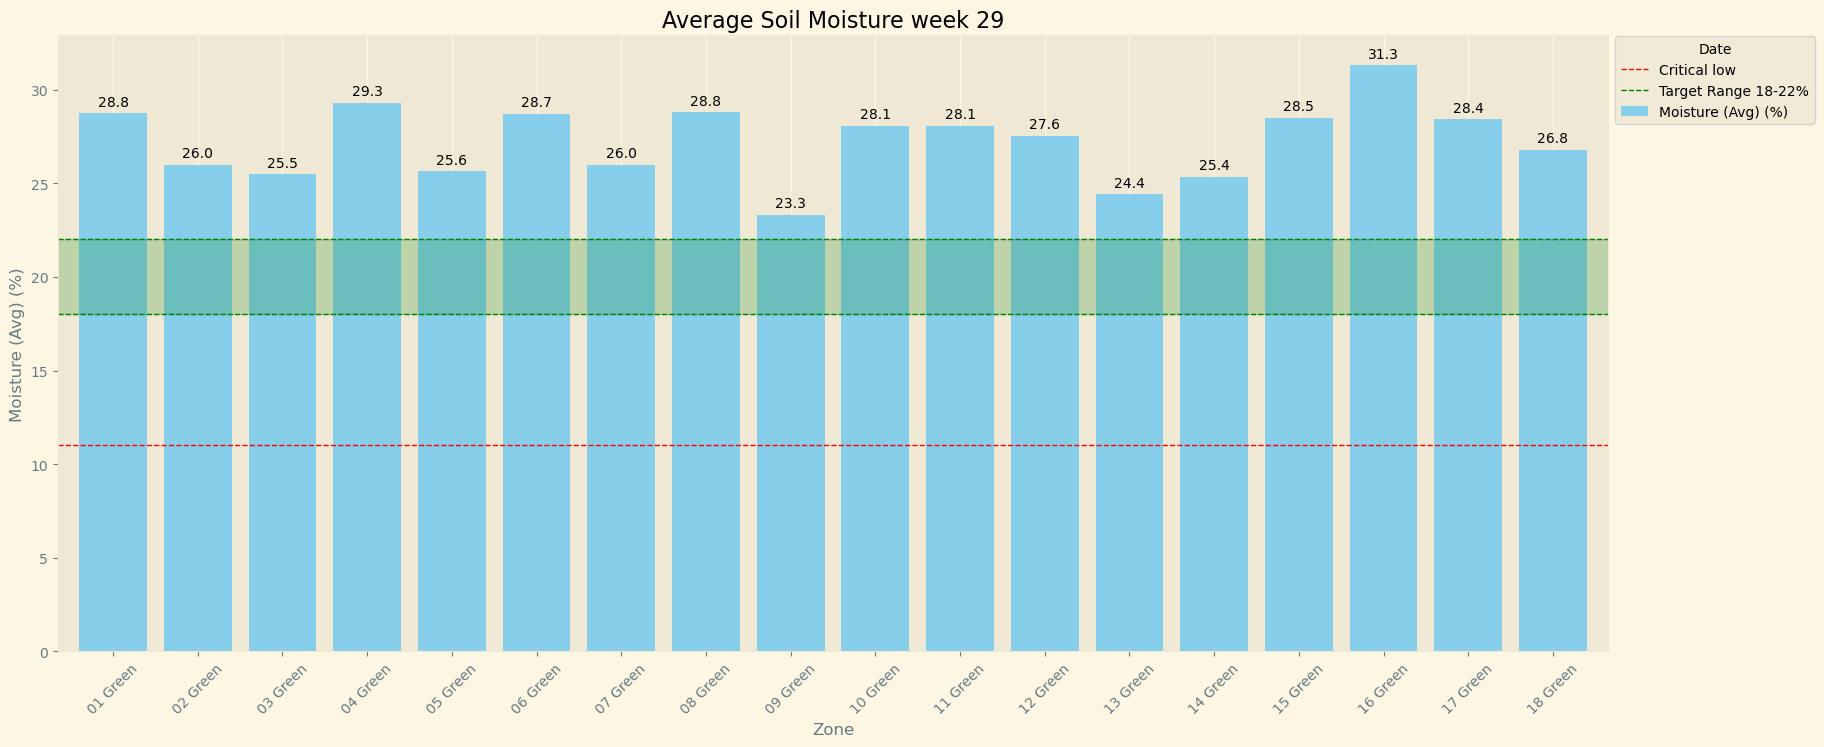

In [ ]:
moistweek = dfpogo[(dfpogo['Week'] == 29) & (dfpogo['Year'] == 2024)]

# Group by 'Zone' and 'Date' to calculate mean soil moisture
grouped_df = moistweek.groupby(['Zone'])['Moisture (Avg) (%)'].mean()

# Plotting
ax = grouped_df.plot(kind='bar', figsize=(20, 8), width=0.8, color=['skyblue'])
plt.title('Average Soil Moisture week 29')
plt.xlabel('Zone')
plt.ylabel('Moisture (Avg) (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 8), 
                textcoords='offset points')

# Adding a red dotted line at 11%
plt.axhline(y=11, color='red', linestyle='--', linewidth=1, label='Critical low')

# Adding green dotted lines at 18% and 22%
plt.axhline(y=18, color='green', linestyle='--', linewidth=1, label='Target Range 18-22%')
plt.axhline(y=22, color='green', linestyle='--', linewidth=1 )

# Shading the area between 18% and 22% with light green
plt.fill_between(ax.get_xlim(), 18, 22, color='green', alpha=0.2)

# Adding legend with the red and green dotted lines
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, title='Date', loc='upper left', bbox_to_anchor=(1, 1.01))

# Display the plot
plt.show()

,Dato,Hul,Stimp_CM,Stimp_F,Stimp_range,Week,Year
0,2023-05-10,Hul 15,249.0,8.2,Low,19,2023
1,2023-05-10,Hul 15,246.0,8.1,Low,19,2023
2,2023-05-10,Hul 15,248.0,8.1,Low,19,2023
3,2023-05-10,Hul 15,273.0,9.0,High,19,2023
4,2023-05-10,Hul 15,280.0,9.2,High,19,2023
